In [1]:
from pfx_functions import *
%matplotlib inline

'''
pfxfile = open('pbp_data/2017/2017_pfx.csv', 'r')

cr = csv.DictReader(pfxfile)
data = []
for row in cr:
    data.append(row)
'''

import pandas as pd
pd.set_option('precision', 1)

In [7]:
pfxfile = open('pbp_data/2017/2017_pfx.csv', 'r')

cr = csv.DictReader(pfxfile)
data = []
for row in cr:
    data.append(row)

In [8]:
show_pitcher_info(data, date_start=170301, date_end=170415, name='피어밴드')

피어밴드 구종 정보
직구      speed: 142.3    pct: 39.1%    h-mov: 8.15 in.    v-mov: 10.86 in.    x-rel: 1.66 ft.    z-rel: 5.76 ft.
슬라이더    speed: 130.4    pct: 4.0%    h-mov: 9.80 in.    v-mov: 2.78 in.    x-rel: 2.06 ft.    z-rel: 5.79 ft.
커브      speed: 119.6    pct: 4.0%    h-mov: -0.39 in.    v-mov: 3.76 in.    x-rel: 2.40 ft.    z-rel: 5.92 ft.
체인지업    speed: 126.7    pct: 28.1%    h-mov: 9.07 in.    v-mov: 8.94 in.    x-rel: 1.85 ft.    z-rel: 5.81 ft.
너클볼     speed: 120.8    pct: 24.1%    h-mov: 1.82 in.    v-mov: 3.41 in.    x-rel: 2.31 ft.    z-rel: 5.73 ft.


In [3]:
v, m = get_results(data, date_start=160301, date_end=161231, pitcherName='피어밴드')

In [12]:
v, m = get_results(data, date_start=170301, date_end=170415, pitcherName='피어밴드', stuff='체인지업')

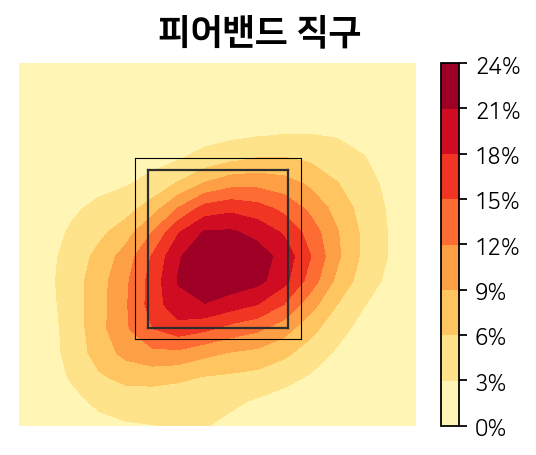

In [11]:
plot_contour_balls(v, title='피어밴드 직구')

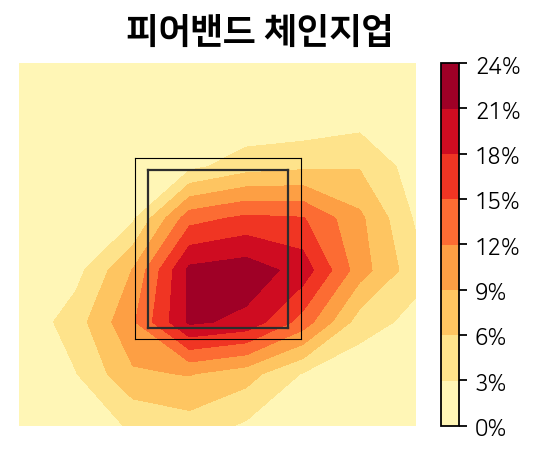

In [13]:
plot_contour_balls(v, title='피어밴드 체인지업')

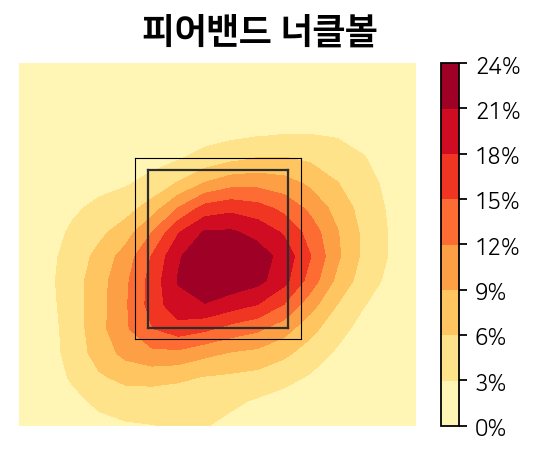

In [10]:
plot_contour_balls(v, title='피어밴드 너클볼')

In [6]:
show_pitcher_info(data, date_start=160301, date_end=160731, name='피어밴드')

피어밴드 구종 정보
직구      speed: 142.6    pct: 48.3%    h-mov: 9.57 in.    v-mov: 10.27 in.    x-rel: 1.78 ft.    z-rel: 5.73 ft.
투심      speed: 144.5    pct: 1.3%    h-mov: 10.95 in.    v-mov: 10.01 in.    x-rel: 1.98 ft.    z-rel: 5.74 ft.
슬라이더    speed: 131.5    pct: 19.5%    h-mov: 3.63 in.    v-mov: 3.88 in.    x-rel: 1.95 ft.    z-rel: 5.73 ft.
커브      speed: 119.3    pct: 10.9%    h-mov: -3.60 in.    v-mov: -1.25 in.    x-rel: 2.21 ft.    z-rel: 5.92 ft.
체인지업    speed: 127.0    pct: 19.8%    h-mov: 10.17 in.    v-mov: 8.91 in.    x-rel: 1.91 ft.    z-rel: 5.74 ft.


In [5]:
show_pitcher_info(data, date_start=160801, date_end=161231, name='피어밴드')

피어밴드 구종 정보
직구      speed: 141.4    pct: 50.2%    h-mov: 8.63 in.    v-mov: 10.14 in.    x-rel: 1.59 ft.    z-rel: 5.87 ft.
투심      speed: 139.8    pct: 2.2%    h-mov: 9.18 in.    v-mov: 10.74 in.    x-rel: 1.70 ft.    z-rel: 5.97 ft.
슬라이더    speed: 129.3    pct: 17.8%    h-mov: 2.86 in.    v-mov: 4.12 in.    x-rel: 1.72 ft.    z-rel: 5.86 ft.
커브      speed: 117.3    pct: 6.2%    h-mov: -4.08 in.    v-mov: -0.96 in.    x-rel: 2.04 ft.    z-rel: 6.04 ft.
체인지업    speed: 126.8    pct: 22.0%    h-mov: 7.82 in.    v-mov: 8.34 in.    x-rel: 1.74 ft.    z-rel: 5.89 ft.
너클볼     speed: 121.9    pct: 1.5%    h-mov: 1.06 in.    v-mov: 3.59 in.    x-rel: 1.91 ft.    z-rel: 5.84 ft.


In [89]:
df = pd.read_csv('pbp_data/2017/2017_pfx.csv',
                usecols=['ballcount', 'batterName', 'pitcherName', 'inn', 'pfx_x', 'pfx_z',
                         'speed', 'stance', 'stuff', 'date', 'result'])

In [90]:
pitchers = df.groupby(['pitcherName'])

fbmask = (df['stuff'] == '직구')
fb = df.loc[fbmask]

slmask = (df['stuff'] == '슬라이더')
sl = df.loc[slmask]

fkmask = (df['stuff'] == '포크')
fk = df.loc[fkmask]

fb_cdf = fb.groupby(['pitcherName']).count()
sl_cdf = sl.groupby(['pitcherName']).count()
fk_cdf = fk.groupby(['pitcherName']).count()

In [144]:
whatiwant = (fb_cdf['ballcount'] > 1000)

In [135]:
fbs = fb.groupby(['pitcherName']).mean().loc[whatiwant].loc[:, 'pfx_x':'speed']
#sls = sl.groupby(['pitcherName']).mean().loc[whatiwant].loc[:, 'pfx_x':'speed']
fks = fk.groupby(['pitcherName']).mean().loc[whatiwant].loc[:, 'pfx_x':'speed']

In [145]:
fbs = fb.groupby(['pitcherName']).mean().loc[whatiwant].loc[:, 'pfx_x':'speed']
fbs['pfx_x'] *= 12
fbs['pfx_z'] *= 12
fbs['pfx_x'] = round(fbs['pfx_x'], 1)
fbs['pfx_z'] = round(fbs['pfx_z'], 1)
display(fbs.sort_values(by=['pfx_z'], ascending=False))

,pfx_x,pfx_z,speed
pitcherName,,,
밴헤켄,9.1,13.4,139.1
윤성환,-4.2,11.8,135.2
차우찬,6.0,11.7,142.2
구창모,6.7,11.6,141.9
함덕주,7.0,11.5,139.8
김원중,-5.8,11.3,141.1
유희관,7.2,11.3,129.1
문승원,-6.3,11.2,143.2
양현종,6.4,11.1,144.1


In [125]:
result = pd.concat([fbs, fks], axis=1)
result.columns = ['fb_pfx', 'fb_pfz', 'fb_speed', 'fk_pfx', 'fk_pfz', 'fk_speed']
result['fb_pfx'] *=12
result['fb_pfz'] *=12
result['fk_pfx'] *=12
result['fk_pfz'] *=12
result['fb_pfx'] = round(result['fb_pfx'],1)
result['fb_pfz'] = round(result['fb_pfz'],1)
result['fk_pfx'] = round(result['fk_pfx'],1)
result['fk_pfz'] = round(result['fk_pfz'],1)
result['diff'] = result['fb_pfz'] - result['fk_pfz']
vmask = (result['fb_speed'] > 140)
result = result.loc[vmask]
display(result.sort_values(by=['diff'], ascending=False))

,fb_pfx,fb_pfz,fb_speed,fk_pfx,fk_pfz,fk_speed,diff
pitcherName,,,,,,,
김상수,-4.2,12.9,140.6,-4.1,2.8,125.4,10.1
서진용,-5.3,12.6,146.1,-3.4,3.2,131.9,9.4
박시영,-4.5,11.8,142.4,-3.2,3.1,132.7,8.7
심수창,-3.7,10.2,141.0,-1.4,1.8,130.1,8.4
송승준,-5.4,11.4,141.4,-5.5,3.1,130.5,8.3
윤규진,-5.4,9.7,140.4,-2.4,1.4,127.4,8.3
이용찬,-7.4,9.8,144.1,-5.8,1.7,126.5,8.1
박세웅,-6.9,8.7,143.3,-2.1,0.9,128.5,7.8
보우덴,-4.0,12.3,143.7,-4.8,4.9,131.5,7.4


In [3]:
second_half = 170715
c_th = 100

dmask = (df['date'] > second_half)
smask = (df['stuff'] == '직구')
cdf1 = df.loc[dmask].loc[smask].groupby(['pitcherName']).count()
cdf2 = df.loc[~dmask].loc[smask].groupby(['pitcherName']).count()
cmask = (cdf1['stuff'] > c_th) & (cdf2['stuff'] > c_th)

In [4]:
first = df.loc[~dmask].loc[smask].groupby(['pitcherName']).mean().loc[cmask]
second = df.loc[dmask].loc[smask].groupby(['pitcherName']).mean().loc[cmask]
diff = first['speed'] - second['speed']
c = diff.sort_values(ascending=False)
for k, v in zip(c.keys(), c.values):
    if abs(v) > 1.0:
        print('{} :   \t{:.1f}'.format(k, v))

김성민 :   	2.5
심수창 :   	2.5
문광은 :   	2.4
정찬헌 :   	2.3
윤성환 :   	2.2
윤규진 :   	1.9
박정진 :   	1.9
고우석 :   	1.8
배영수 :   	1.6
이보근 :   	1.6
박희수 :   	1.5
백정현 :   	1.5
이민호 :   	1.4
박종훈 :   	1.4
송승준 :   	1.3
정용운 :   	1.3
심동섭 :   	1.3
오간도 :   	1.2
원종현 :   	1.2
함덕주 :   	1.1
홍성용 :   	1.1
보우덴 :   	1.1
김재영 :   	1.0
구창모 :   	1.0
장시환 :   	1.0
소사 :   	-1.0
주권 :   	-1.0
엄상백 :   	-1.1
장현식 :   	-1.1
김주한 :   	-1.1
김대우 :   	-1.3
신재웅 :   	-1.3
우규민 :   	-1.4
권오준 :   	-1.4
김사율 :   	-1.4
하영민 :   	-1.5
허프 :   	-1.6
밴헤켄 :   	-1.7
페트릭 :   	-1.7
김대현 :   	-1.9
김강률 :   	-2.0
장필준 :   	-2.0
헥터 :   	-2.1
박진형 :   	-2.1
한현희 :   	-2.1
이동현 :   	-2.7
김명신 :   	-4.1


In [13]:
pname = '이동현'
print(first.loc[pname]['speed'])
print(second.loc[pname]['speed'])

138.200956938
140.883458647


In [3]:
v, _ = get_results(data, date_start=170301, date_end=171231, light=True)

S-Zone size: 581 sq.inch
S-Zone size: 439 sq.inch


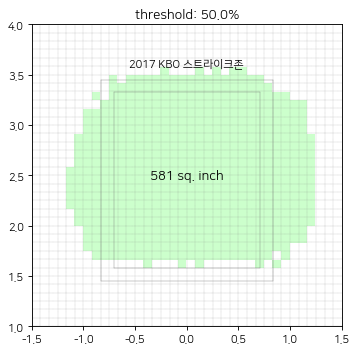

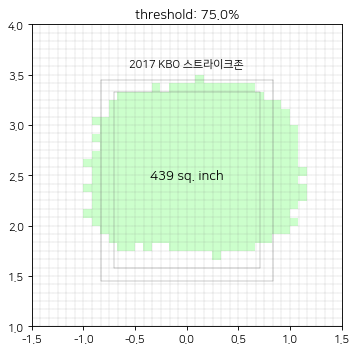

In [4]:
threshold = [0.5, 0.75]

for th in threshold:
    plot_szone(v, threshold=th, title='2017 KBO 스트라이크존', show_area=True)

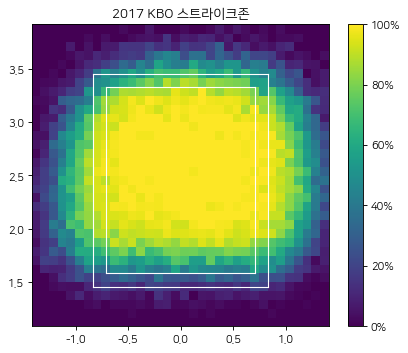

In [5]:
plot_heatmap(v, title='2017 KBO 스트라이크존')